In [21]:
# My neural net model
from neural_net import neural_net
from vis_utils import plotStats, plotData
from gradient_utils import gradient_difference
from tuning_utils import tuning_hyper_parameter
from vis_utils import visualize_grid_withoutRGB, visualize_grid

# Linear algebra library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from vis_utils import visualize_grid_withoutRGB, visualize_grid
def show_net_weights(net, Wkey):
    plt.figure(figsize=(7,7))
    W1 = net.function_params[Wkey]
    Z, N = W1.shape
    size = int(np.sqrt(Z))
    W1 = W1.reshape(size, size,-1).transpose(2,0,1)
    print(W1.shape)
    plt.imshow(visualize_grid_withoutRGB(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

In [3]:
# Loading digits dataset

from scipy.io import loadmat
from mlxtend.data import loadlocal_mnist
digits_image_path = 'data/train_images'
digits_labels_path = 'data/train_labels'
images, labels = loadlocal_mnist(images_path= digits_image_path, labels_path = digits_labels_path)
images_test, labels_test = loadlocal_mnist(images_path = 'data/test_images', labels_path = 'data/test_labels')
images = images.astype(int)
print(f'shape of images dataset : {images.shape}')
# labels = labels.astype(int).reshape(len(labels), 1)# Conver the (10000,) array to a matrix (10000, 1)
labels = labels.astype(int)
print(f'shape of labels dataset : {labels.shape} ')
images_test = images_test.astype(int)
print(f'shape of images_test dataset : {images_test.shape}')
labels_test = labels_test.astype(int)
# labels_test = labels_test.astype(int).reshape(len(labels_test), 1)
print(f'shape of labels_test dataset : {labels_test.shape} ')

shape of images dataset : (60000, 784)
shape of labels dataset : (60000,) 
shape of images_test dataset : (10000, 784)
shape of labels_test dataset : (10000,) 


In [4]:
num_samples, pixels_square = images.shape
pixel_size = int(np.sqrt(pixels_square))
images = images.reshape(num_samples, pixel_size, pixel_size)
print(images.shape)
images_test = images_test.reshape(images_test.shape[0], 28, 28)
print(images_test.shape)
# X = images - np.mean(images, axis = 0) # Normalize the data is very important for fastest converge
X = images

(60000, 28, 28)
(10000, 28, 28)


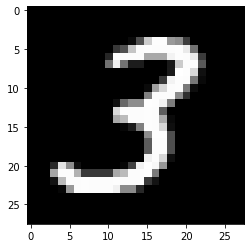

In [5]:
# Let's see some images
num_images = 1

idx = np.random.choice(num_samples, num_images)
for i in range(num_images):
    plt.imshow(X[idx[i]].reshape(pixel_size,pixel_size))
    plt.show()

In [6]:
images = images.reshape(num_samples, pixel_size, pixel_size)
print(images.shape)
images_test = images_test.reshape(images_test.shape[0], 28, 28)
print(images_test.shape)
# X = images - np.mean(images, axis = 0) # Normalize the data is very important for fastest converge
# X_val = images_test - np.mean(images, axis = 0)
X = images
X_val = images_test
X_val = X_val.reshape(X_val.shape[0], -1)
X = X.reshape(num_samples, -1)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
y = labels
y_val = labels_test

In [29]:
net_params = {'il': pixels_square, 'hl1':9, 'ol': 10} 
# activ_function = 'ReLu'
# cost_function = 'SoftMax'
activ_function = 'ReLu'
cost_function = 'SoftMax'
best_net, net_params, lr, reg, results = tuning_hyper_parameter(net_params , X, y, X_val, 
                                y_val, h_min = 5, h_max = 500, reg_min = -7, reg_max = 6, 
                                lr_min = -4, lr_max = -4,max_count = 10, epoch = 1000, 
                                max_iter = 5000,method = 'sgd', batch_size = 200, 
                                learning_decay = 0.99, hidden_layers = 1, 
                                activation_function = 'ReLu', cost_function = 'SoftMax')


 Tuning with stochastic gradient descent



{'il': 784, 'hl1': 36, 'ol': 10}
lr 0.0001 reg 0.0 loss 1.25247 train accuracy: 0.63505 val accuracy: 0.6344

 Tuning with stochastic gradient descent



{'il': 784, 'hl1': 469, 'ol': 10}
lr 0.0001 reg 2.29286 loss 25.9369 train accuracy: 0.94295 val accuracy: 0.9409

 Tuning with stochastic gradient descent


#### LOSS EXPLOTE #### 


{'il': 784, 'hl1': 132, 'ol': 10}
lr 0.0001 reg 0.0045 loss inf train accuracy: 0.10235 val accuracy: 0.1014

 Tuning with stochastic gradient descent



{'il': 784, 'hl1': 272, 'ol': 10}
lr 0.0001 reg 0.0002 loss 1.35644 train accuracy: 0.9408 val accuracy: 0.9222

 Tuning with stochastic gradient descent



{'il': 784, 'hl1': 234, 'ol': 10}
lr 0.0001 reg 0.0 loss 1.21954 train accuracy: 0.9390666666666667 val accuracy: 0.9219

 Tuning with stochastic gradient descent



{'il': 784, 'hl1': 182, 'ol': 10}
lr 0.0001 reg 3.80649 loss 1.75807 train accuracy: 0.9014333333333333 val accuracy: 0.909

 Tuning with stochastic gradient descent



{'il': 784, 'hl1': 325, 'ol': 10}
lr 0.0001 reg 1607.81882 loss 2.71871 train accuracy: 0.0993 val accuracy: 0.1032

 Tuning with stochastic gradient descent



{'il': 784, 'hl1': 326, 'ol': 10}
lr 0.0001 reg 30.83295 loss 2.18491 train accuracy: 0.6662 val accuracy: 0.6868

 Tuning with stochastic gradient descent



{'il': 784, 'hl1': 323, 'ol': 10}
lr 0.0001 reg 0.01442 loss 10.50034 train accuracy: 0.9449 val accuracy: 0.9282

 Tuning with stochastic gradient descent



{'il': 784, 'hl1': 474, 'ol': 10}
lr 0.0001 reg 0.01385 loss 14.07566 train accuracy: 0.9486833333333333 val accuracy: 0.9308

 best validation accuracy achieved: 0.940900


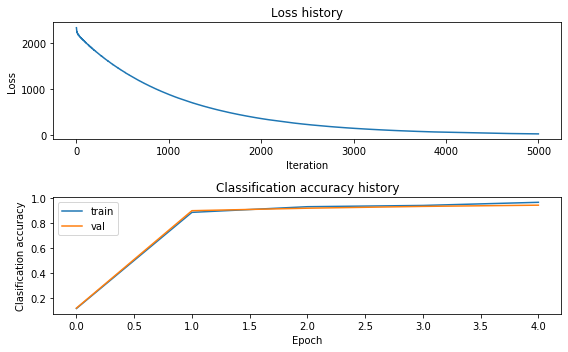

In [30]:
plotStats(results)

(469, 28, 28)


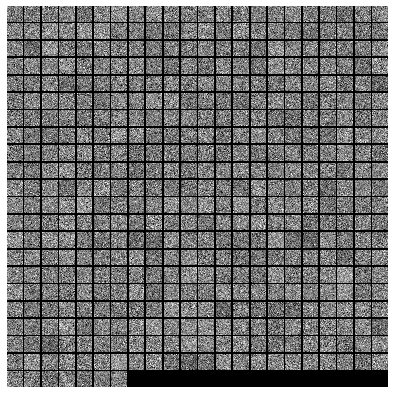

In [31]:
show_net_weights(best_net, 'W1')

In [32]:
y_pred = best_net.predict(X)
print(f'{(y_pred == y).mean() * 100}')
y_pred_val, y_score_val = best_net.predict(X_val, with_score=True)
print(f'{(y_pred_val == y_val).mean() * 100}')

94.295
94.08999999999999


In [26]:
y_score_val[8]

array([2.18823625e-57, 1.48296435e-78, 3.82645150e-28, 1.19303991e-59,
       5.61045115e-27, 9.99097897e-01, 2.76403328e-04, 2.12774830e-88,
       6.25699866e-04, 6.26874341e-64])

In [13]:
y_pred_val[8]

6

In [14]:
np.exp(best_net.forward_results['flc2'][8])

array([1.02715753e+00, 6.05866528e-02, 5.24424683e+00, 4.29012196e-02,
       2.73962185e+00, 4.05578606e+00, 4.68079778e+01, 1.42174382e-02,
       1.00338249e+00, 3.78205777e-01])

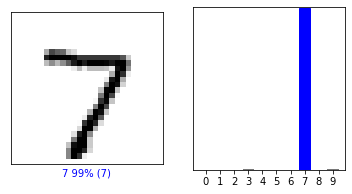

In [33]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,100*np.max(predictions_array),true_label),color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_score_val[i], y_val, X_val.reshape(len(y_val), 28, 28))
plt.subplot(1,2,2)
plot_value_array(i, y_score_val[i],  y_val)
plt.show()

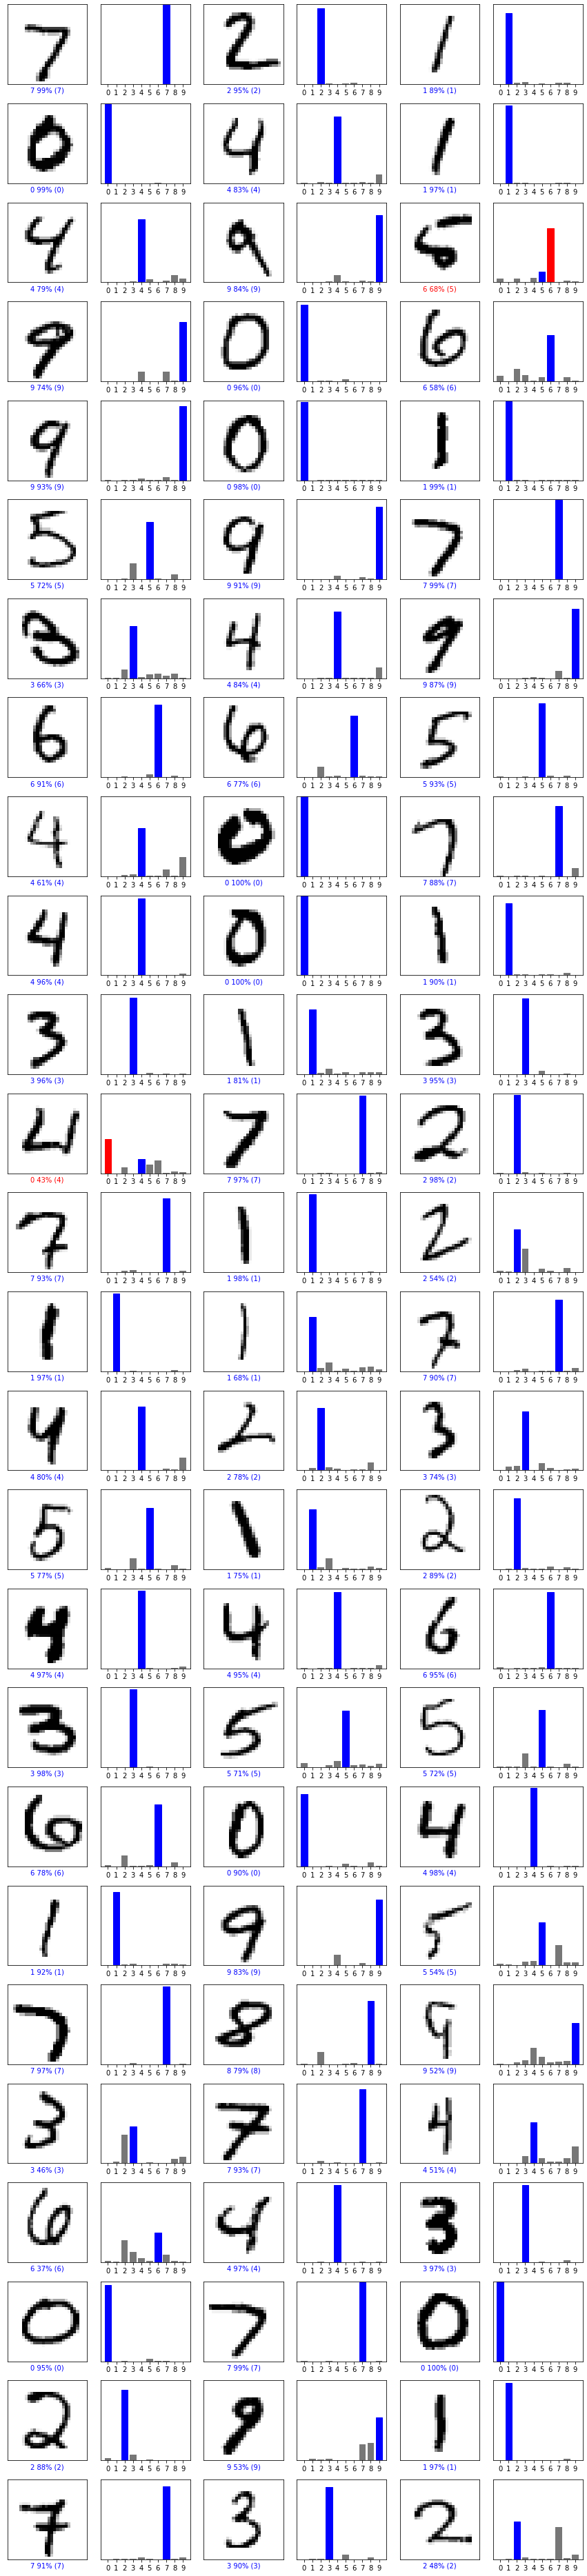

In [34]:
num_rows = 26
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_score_val[i], y_val, X_val.reshape(len(y_val), 28, 28))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_score_val[i], y_val)
plt.tight_layout()
plt.show()

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [ ]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

In [ ]:
plt.imshow(train_images[0])
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
test_images.shape

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(311, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate = 0.00052),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
predictions = model.predict(test_images)


In [ ]:
predictions[0]


In [ ]:
np.argmax(predictions[0])

In [ ]:
test_labels[0]

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,100*np.max(predictions_array),true_label),color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()